<a href="https://colab.research.google.com/github/ysnlakshmi/21-Day-Project/blob/main/Project_5_Customer_Segmentation_with_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 5: Customer Segmentation with Clustering 🛍️

**Project Objective:** To use unsupervised machine learning to identify distinct groups of customers within a mall's dataset. By segmenting customers based on multiple dimensions (income, age, spending habits), we can provide rich, actionable insights to the marketing team for highly targeted campaigns.


### Core Concepts We'll Cover:
1.  **Unsupervised Learning:** Understanding the difference between supervised and unsupervised learning.
2.  **Clustering Fundamentals & K-Means:** A deep dive into how the K-Means algorithm works.
3.  **The Elbow Method:** A critical technique for finding the optimal number of clusters (`k`).
4.  **Multi-dimensional EDA:** Exploring relationships between all features using 2D and 3D plots.
5.  **Multiple Segmentation Models:** Building and interpreting different clustering models based on different feature sets.
6.  **Hierarchical Clustering:** A brief introduction to an alternative clustering method.
7.  **Data-Driven Personas:** Translating cluster statistics into actionable business strategies.

### **Theoretical Concept: What is Unsupervised Learning?**

So far, we have worked with **supervised learning**, where our datasets had a specific target variable we were trying to predict (e.g., `SalePrice`, `Survived`). The model *learns* the relationship between features and the known target.

**Unsupervised learning** is different. Here, we work with datasets that **do not have a target variable**. The goal is not to predict a known outcome, but to discover hidden patterns, structures, and relationships within the data itself.

**Clustering** is the most common type of unsupervised learning. The objective is to group data points into clusters, such that points within the same cluster are very similar to each other, and points in different clusters are very dissimilar.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set_style('whitegrid')

Imagine you have a bunch of unsorted toys (your data points) and you want to group them into different boxes (your clusters) based on how similar they are. K-Means is like a helper that does this for you!

K-Means Algorithm: Grouping the Toys

* Choose how many boxes you want (Choose k): You decide beforehand how many groups you want to create. Let's say you want 3 boxes (so k=3).
* Place some "toy leaders" in the boxes (Initialize centroids): K-Means randomly picks 3 toys and places one in each box. These toys are the "leaders" or "centroids" of their boxes for now.
* Sort the toys by how close they are to the leaders (Assign points to clusters): K-Means looks at every single toy and figures out which "toy leader" it's closest to. It then puts each toy into the box with the closest leader.
* Find the new average location of the leaders (Update centroids): Once all the toys are in boxes, K-Means calculates the average location of all the toys in each box. These average locations become the new "toy leaders" or centroids.
* Repeat steps 3 and 4 until the leaders stop moving (Iterate until convergence): K-Means keeps repeating the sorting and leader-finding steps. It does this until the "toy leaders" don't move much anymore, meaning the groups are stable.
Once the algorithm stops, you have your toys sorted into k boxes (clusters), where the toys in each box are generally similar to each other.

In [2]:
# Load the dataset from the user-provided file
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Mall_Customers.csv')

print("Dataset loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()



Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 5.59 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Dataset loaded successfully.
Data shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step 2: In-Depth Exploratory Data Analysis (EDA)
Before clustering, we must understand the features and their relationships to find the most promising dimensions for segmentation.

In [3]:
# Basic info and statistics
print("Dataset Info:")
df.info()

# Drop the CustomerID as it's just an identifier and not useful for clustering
df.drop('CustomerID', axis=1, inplace=True)

print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Descriptive Statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     4

#### 2.1 Univariate Analysis (Feature Distributions)

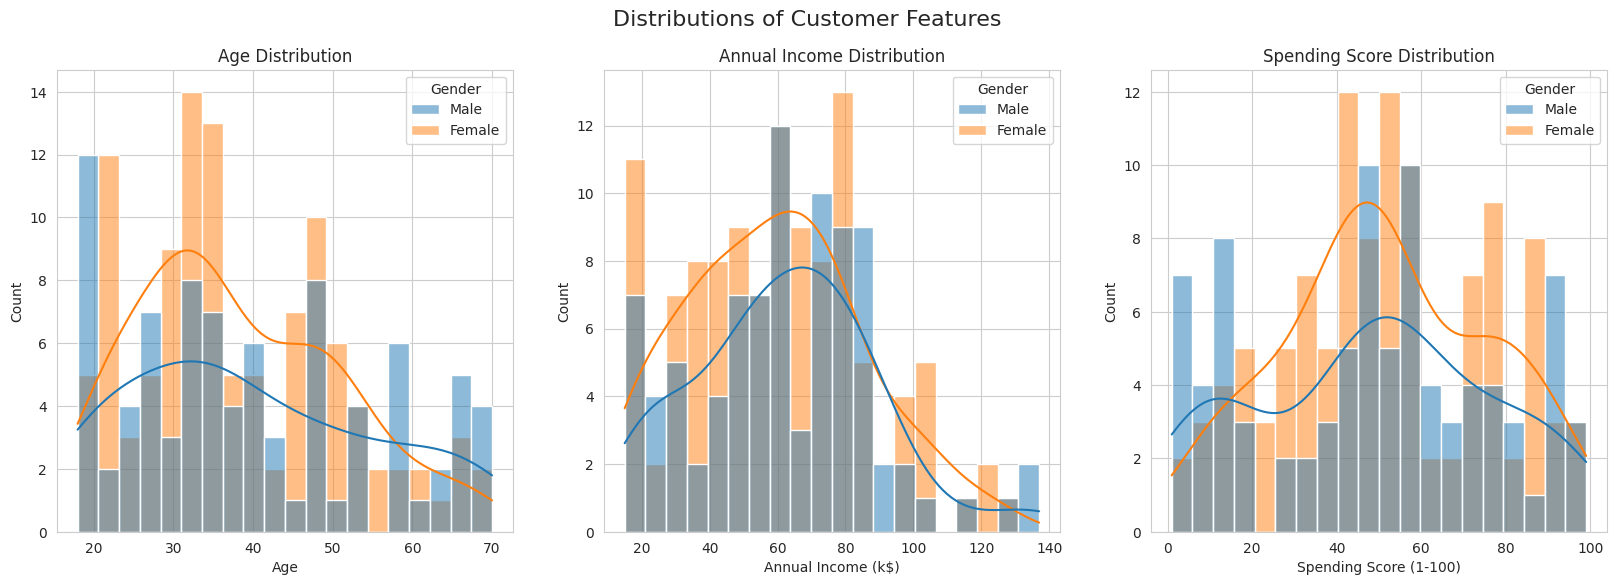

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distributions of Customer Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=20, hue='Gender').set_title('Age Distribution')
sns.histplot(ax=axes[1], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title('Annual Income Distribution')
sns.histplot(ax=axes[2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution')

plt.show()

#### 2.2 Bivariate Analysis (Looking for Relationships)

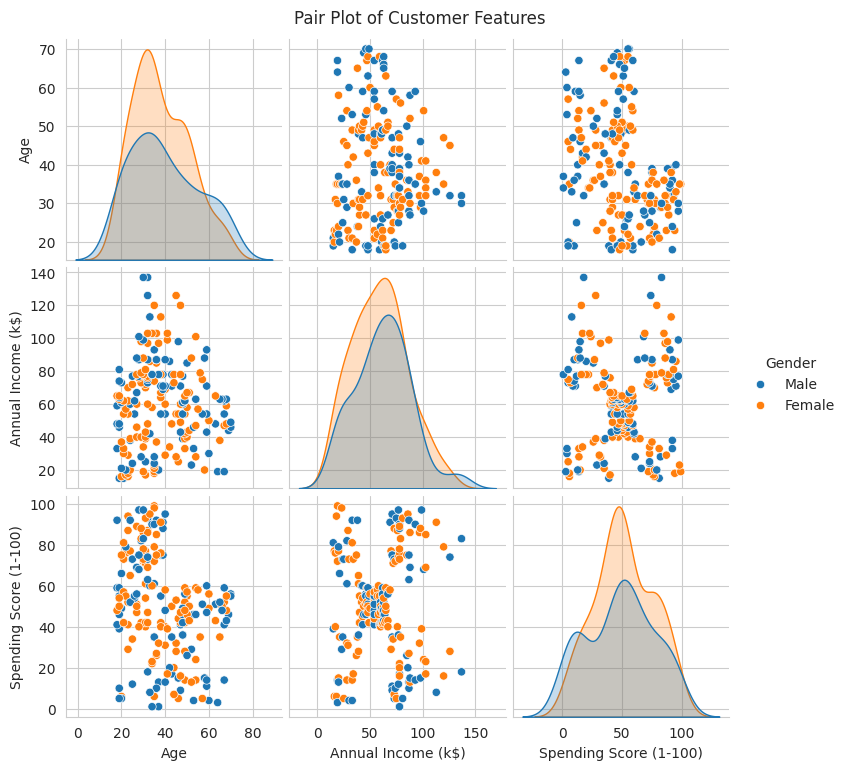

In [5]:
# Using pairplot to visualize relationships between all numerical variables
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

**CRITICAL INSIGHT from Pair Plot:**
- The **`Annual Income` vs. `Spending Score`** plot is the most revealing. It clearly shows distinct, blob-like groups, making it the perfect candidate for clustering.
- The **`Age` vs. `Spending Score`** plot shows some patterns but they are less defined. We see a concentration of high-spending customers in the younger age brackets.
- `Gender` does not appear to be a strong separating factor in any of these plots, as the distributions for males and females largely overlap.

#### 2.3 3D Visualization
Let's visualize the three most important features together in an interactive 3D plot to see if the clusters hold up.

In [6]:
fig = px.scatter_3d(df,
                    x='Annual Income (k$)',
                    y='Spending Score (1-100)',
                    z='Age',
                    color='Gender',
                    title='3D View of Customer Data')
fig.show()

### Step 3: Segmentation Model 1 - Income & Spending Score
This is our primary segmentation model, focusing on the most promising features identified in the EDA.

## **Theoretical Concept: The Elbow Method**

How do we choose the best number of clusters (`k`) for our K-Means model? The **Elbow Method** is a common technique.

It works by calculating the **Within-Cluster Sum of Squares (WCSS)** for different values of `k` (typically from 1 to 10). WCSS is the sum of the squared distances between each point and the centroid of the cluster it belongs to. A lower WCSS means the points are closer to their cluster centroids, indicating tighter clusters.

We then plot WCSS against the number of clusters (`k`). As `k` increases, WCSS will always decrease (because each point gets closer to its assigned centroid). However, at some point, adding more clusters doesn't significantly reduce the WCSS. This point, where the rate of decrease sharply changes, looks like an "elbow" in the plot.

The **optimal number of clusters (`k`)** is typically chosen at this elbow point. It represents a good balance between having too few clusters (high WCSS) and too many clusters (overfitting and diminishing returns).

Here are the most common init options available:

* 'k-means++' (Default): This is the recommended method. It smarty initializes the centroids to be spread out from each other. This significantly improves the chances of finding a globally optimal solution and reduces the risk of converging to a suboptimal local minimum.
* 'random': This method chooses n_clusters observations (data points) randomly from the dataset and uses them as the initial centroids. While simple, it can sometimes lead to poor clustering results if the random initial centroids are not well-separated.
* A NumPy array: You can also provide a NumPy array with a shape of (n_clusters, n_features) that explicitly specifies the initial coordinates of the centroids. This is useful if you have prior knowledge about where the clusters should be located or if you want to replicate a specific initialization.

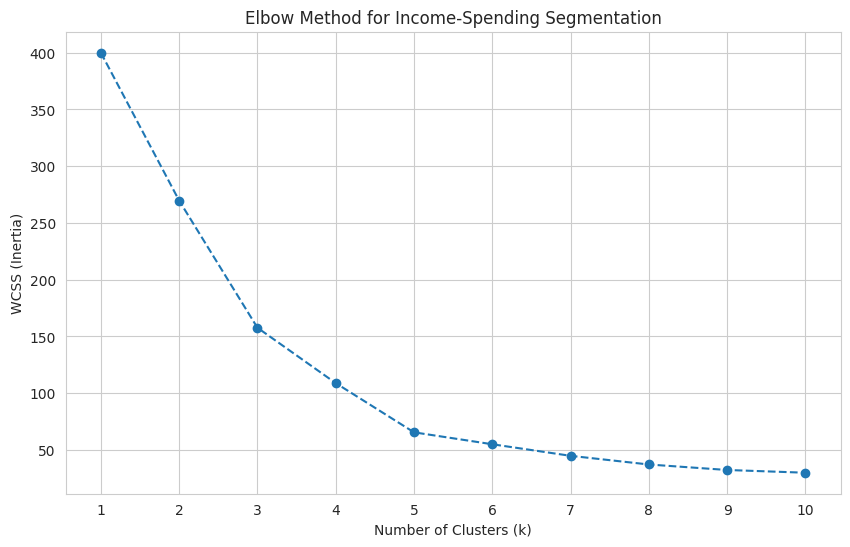

In [7]:
# 1. Select and scale the features
X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

# 2. Implement the Elbow Method
wcss1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1_scaled)
    wcss1.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

Imagine you've grouped your friends into different clubs (these are your clusters). WCSS helps you figure out how "together" or "spread out" the members are within each club.

Cluster: This is one of the groups you've formed.
Centroid: This is the "center point" of a cluster. Think of it as the average location of all the members in that club.
WCSS: For each cluster, you calculate the distance from every member in that cluster to the cluster's centroid. Then you square all these distances and add them up. You do this for all the clusters and add up the totals.
A low WCSS means that the points within each cluster are very close to their centroid. This suggests that the clusters are tight and well-defined.

A high WCSS means that the points within each cluster are more spread out from their centroid, indicating less distinct or looser clusters.

How WCSS relates to K-Means:

In K-Means, the algorithm's goal is to minimize the WCSS. It tries to find the best locations for the centroids and the best groupings of points so that the total WCSS is as small as possible.

The Elbow Method, which you saw in the notebook, uses WCSS to help choose the optimal number of clusters (k) for K-Means. You calculate the WCSS for different values of k and look for the "elbow" where the decrease in WCSS starts to slow down. This point suggests that adding more clusters doesn't significantly improve the "tightness" of the clusters.

**Observation:** The "elbow" of the curve is clearly at **k=5**. The WCSS decreases sharply until k=5, and then the rate of decrease flattens out. This confirms our visual intuition from the scatter plot!

In [8]:
# Build and fit the final model
kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Income_Cluster'] = kmeans1.fit_predict(X1_scaled)

#### 3.1 Visualizing and Interpreting the Income-Based Segments

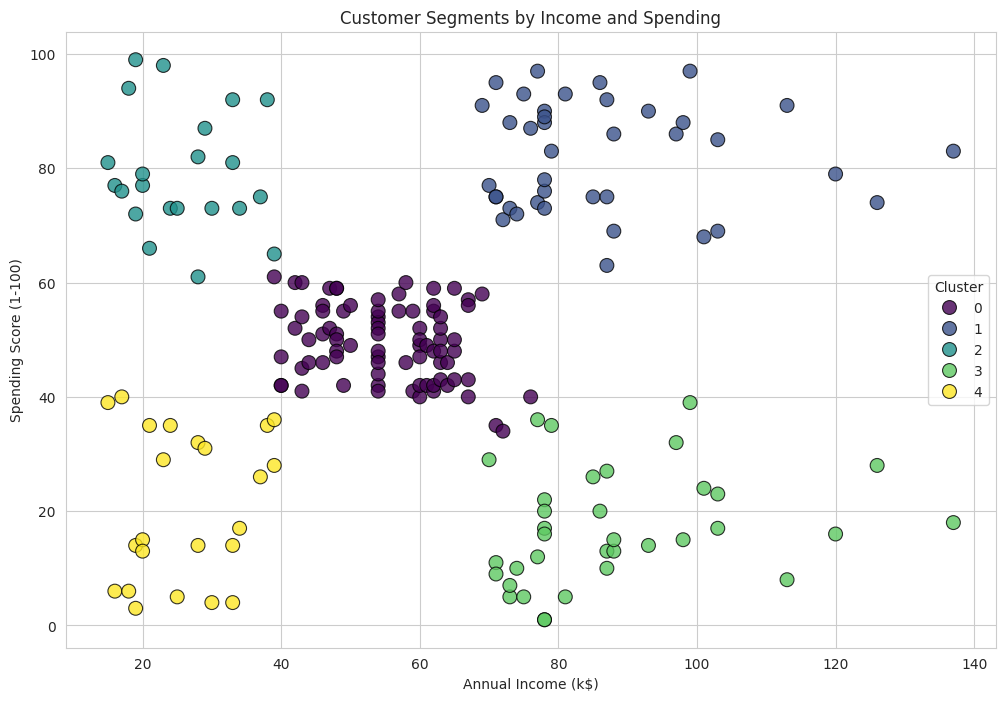

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Income_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [10]:
# Quantitative Persona Analysis
cluster_profiles1 = df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size'] = df['Income_Cluster'].value_counts()
print("--- Income-Based Cluster Profiles ---")
cluster_profiles1

--- Income-Based Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Size
Income_Cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


#### 3.2 Income-Based Personas and Strategy
Using the quantitative profiles, we can define our segments:
- **Cluster 0 (Careful High-Earners):** High income (~88k) but low spending (~17). Cautious, value-driven buyers.
- **Cluster 1 (Standard):** Average income (~55k) and spending (~50). This is the largest, core customer group.
- **Cluster 2 (Budget Shoppers):** Low income (~26k) and low spending (~21). Highly price-sensitive.
- **Cluster 3 (Target - High Value):** High income (~87k) and high spending (~82). The mall's prime target.
- **Cluster 4 (Enthusiasts):** Low income (~26k) but high spending (~79). Likely young, trend-focused shoppers.

### Step 4: Segmentation Model 2 - Age & Spending Score
Let's create a different segmentation model to see if we can find age-related customer groups.

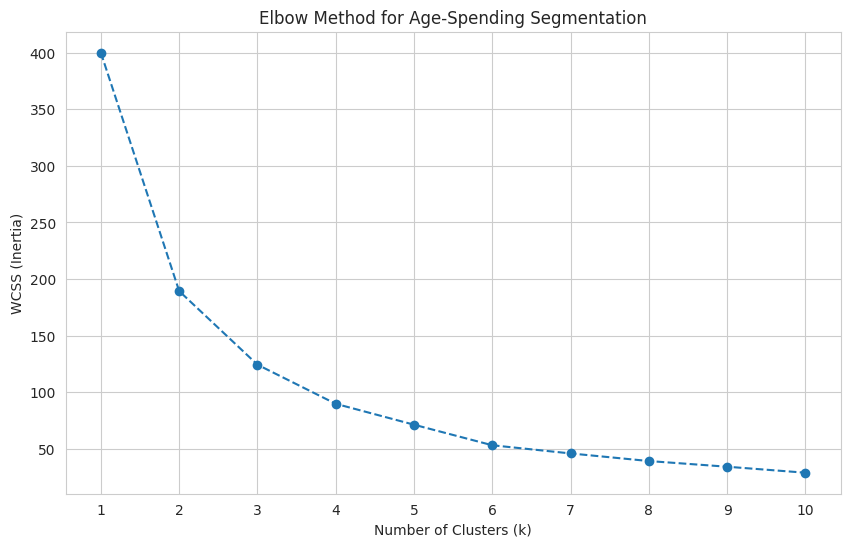

In [11]:
# 1. Select and scale the features
X2 = df[['Age', 'Spending Score (1-100)']]
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# 2. Implement the Elbow Method
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss2.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

**Observation:** The elbow is less sharp here, but **k=4** appears to be a reasonable choice.

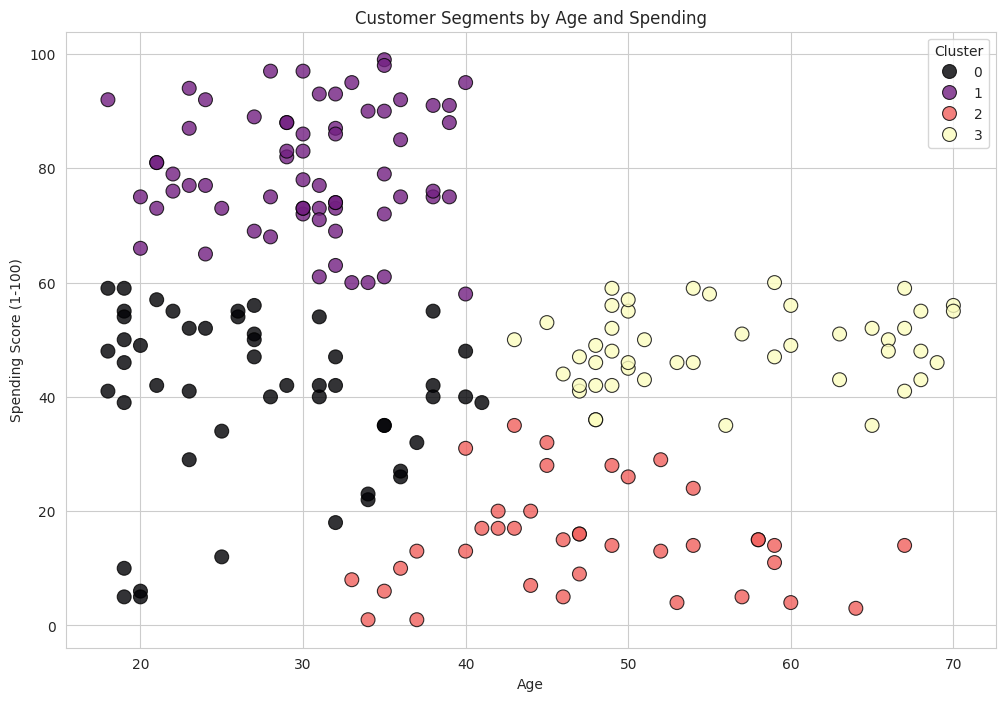

In [12]:
# Build and fit the final model for age segmentation
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)

# Visualize the new clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

#### 4.1 Interpreting the Age-Based Segments
This model gives us a different perspective:
- **Young High-Spenders:** A clear group of customers under 40 with high spending scores.
- **Young Low-Spenders:** Customers under 40 with low-to-moderate spending.
- **Older Average-Spenders:** Customers over 40 with moderate spending scores.
- **Older Low-Spenders:** A small group of older customers with very low spending scores.

### Step 5: An Alternative Method - Hierarchical Clustering
To add more depth, let's briefly look at another clustering technique.

#### **Theoretical Concept: Hierarchical Clustering & Dendrograms**
Unlike K-Means, Hierarchical Clustering doesn't require us to specify the number of clusters beforehand. It builds a tree-like hierarchy of clusters.

We can visualize this hierarchy with a **dendrogram**. The dendrogram shows how clusters are merged (or split). To find the optimal number of clusters, we look for the tallest vertical line that doesn't cross any horizontal lines and draw a horizontal line through it. The number of vertical lines our new line crosses is the optimal number of clusters.


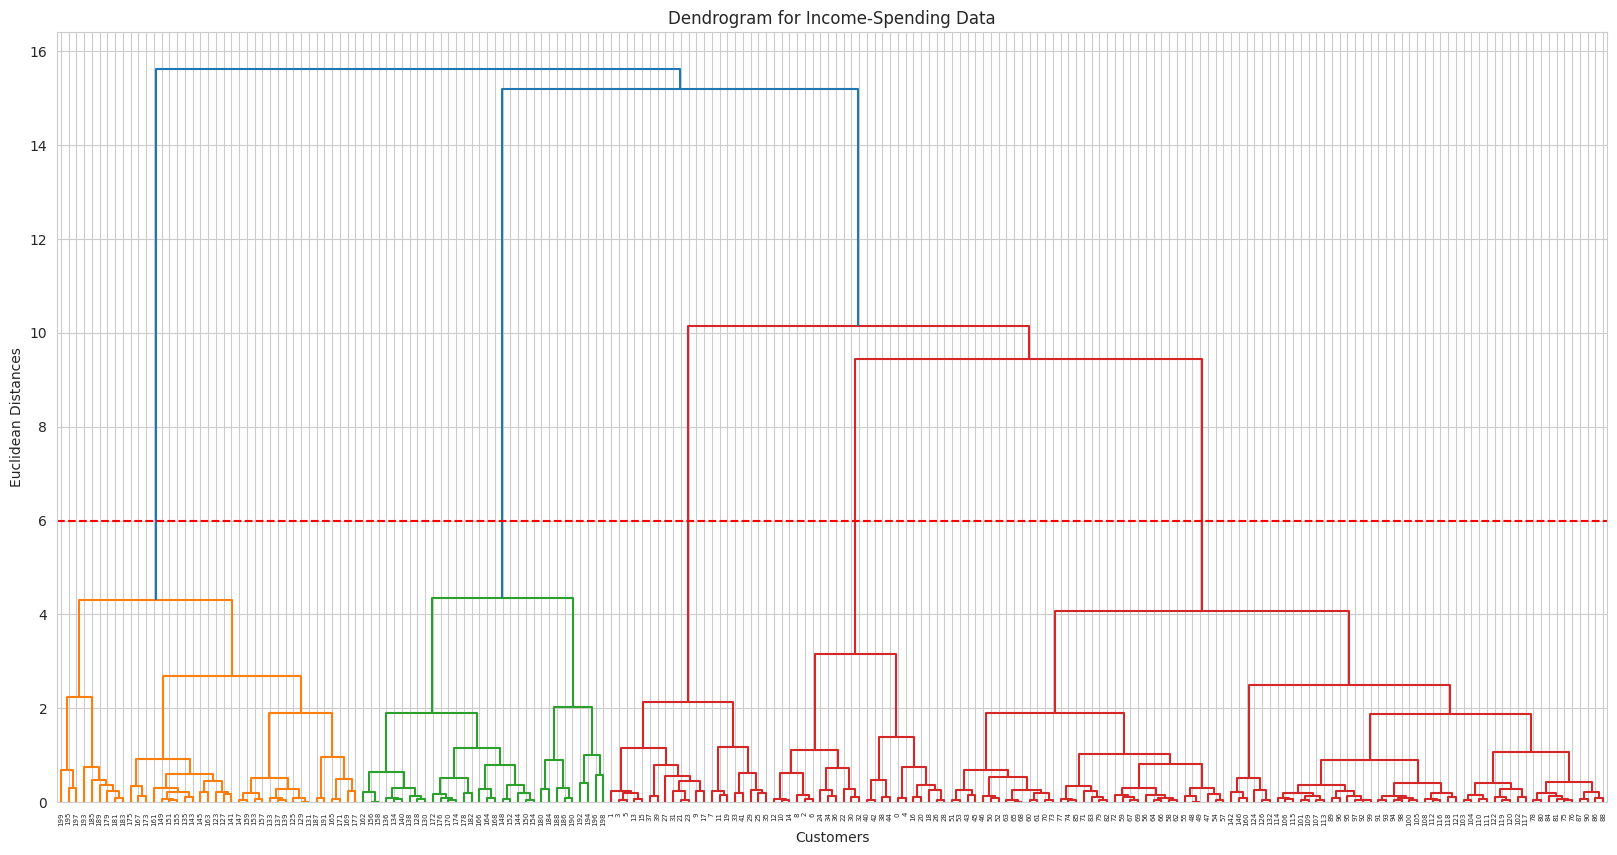

In [13]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X1_scaled, method='ward'))
plt.title('Dendrogram for Income-Spending Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=6, color='r', linestyle='--') # Example cut-off line
plt.show()

**Insight:** The dendrogram also confirms that **5 clusters** is the optimal number for the income-spending data. If we draw a horizontal line at a height of 6 (as shown by the red dashed line), it crosses five vertical lines.

### Step 6: Conclusion

In this extended project, we successfully applied unsupervised machine learning to perform customer segmentation.

**Key Steps Undertaken:**
1.  **Performed an in-depth EDA:** Used 2D and 3D plots to explore customer data from multiple angles.
2.  **Built two distinct segmentation models:** Created an income-based model and an age-based model, showing that segmentation is not a one-size-fits-all process.
3.  **Used the Elbow Method** to programmatically determine the optimal number of clusters for each scenario.
4.  **Introduced Hierarchical Clustering** as an alternative method and used its dendrogram to validate our choice of `k`.
5.  **Created quantitative, data-driven personas** for each segment, providing the marketing team with precise, actionable insights for targeted campaigns.

This project highlights how different clustering approaches can uncover different facets of customer behavior, providing a richer, more nuanced understanding than a single model alone.

### Submission Criteria

Based on the project objectives and the insights gained from the initial analysis, here are the key criteria for your submission:

1.  **Explore Gender vs. Spending Score:** Analyze the relationship between 'Gender' and 'Spending Score (1-100)' to see if gender plays a significant role in spending habits. Visualizations and summary statistics would be helpful here.
2.  **Apply Feature Engineering for Clustering:** Create a new feature using existing data (Feature Engineering). Then, explore if clustering can be effectively performed using this newly engineered feature in combination with one or more existing features. Document the feature engineering process, the chosen features for clustering, the determination of the optimal number of clusters (e.g., using the Elbow Method), and the resulting cluster visualization and interpretation.

1.  **Explore Gender vs. Spending Score:** Analyze the relationship between 'Gender' and 'Spending Score (1-100)' to see if gender plays a significant role in spending habits. Visualizations and summary statistics would be helpful here.


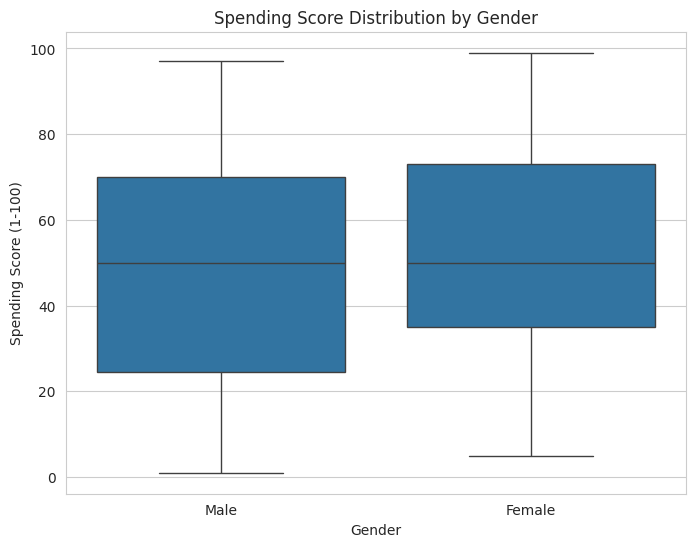


Summary Statistics of Spending Score by Gender:
        count       mean       std  min   25%   50%   75%   max
Gender                                                         
Female  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0
Male     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0


In [14]:
# Analyze the relationship between Gender and Spending Score

# Visualize the distribution of Spending Score for each gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')
plt.title('Spending Score Distribution by Gender')
plt.show()

# Get summary statistics for Spending Score by gender
print("\nSummary Statistics of Spending Score by Gender:")
print(df.groupby('Gender')['Spending Score (1-100)'].describe())

2. **Apply Feature Engineering for Clustering:** Create a new feature using existing data (Feature Engineering). Then, explore if clustering can be effectively performed using this newly engineered feature in combination with one or more existing features. Document the feature engineering process, the chosen features for clustering, the determination of the optimal number of clusters (e.g., using the Elbow Method), and the resulting cluster visualization and interpretation.

# Task
Analyze the relationship between 'Gender' and 'Spending Score (1-100)' using visualizations and summary statistics. Then, perform K-Means clustering on the dataset, including feature engineering, feature selection, scaling, determining the optimal number of clusters using the elbow method, building and fitting the model, visualizing the clusters, and interpreting the results.

## Feature engineering

### Subtask:
Create a new feature based on existing features that could be useful for clustering.


**Reasoning**:
Create a new feature 'Income_Spending_Ratio' by dividing 'Annual Income (k$)' by 'Spending Score (1-100)', handling potential division by zero, and then display the first few rows and descriptive statistics of the updated dataframe to verify the new feature.



In [15]:
# Create the new feature 'Income_Spending_Ratio'
# Add a small epsilon to the denominator to avoid division by zero before replacing with NaN
df['Income_Spending_Ratio'] = df['Annual Income (k$)'] / (df['Spending Score (1-100)'] + 1e-6)

# Handle potential infinite values resulting from division by zero (if not using epsilon)
df['Income_Spending_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values (which could occur if Spending Score was exactly 0 and epsilon was not added, or from the replace step)
# Using the mean is a common strategy, but 0 might also be appropriate depending on interpretation.
# Let's use the mean for now.
df['Income_Spending_Ratio'].fillna(df['Income_Spending_Ratio'].mean(), inplace=True)

print("DataFrame with new feature 'Income_Spending_Ratio':")
display(df.head())

print("\nDescriptive Statistics of 'Income_Spending_Ratio':")
print(df['Income_Spending_Ratio'].describe())

DataFrame with new feature 'Income_Spending_Ratio':


/tmp/ipython-input-3446256031.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-3446256031.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or 

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_Cluster,Age_Cluster,Income_Spending_Ratio
0,Male,19,15,39,4,0,0.384615
1,Male,21,15,81,2,1,0.185185
2,Female,20,16,6,4,0,2.666666
3,Female,23,16,77,2,1,0.207792
4,Female,31,17,40,4,0,0.425000



Descriptive Statistics of 'Income_Spending_Ratio':
count    200.000000
mean       2.824116
std        8.025782
min        0.185185
25%        0.884773
50%        1.126136
75%        1.581255
max       77.999922
Name: Income_Spending_Ratio, dtype: float64


## Select features for clustering

### Subtask:
Choose the engineered feature along with one or more existing features for the clustering analysis.


**Reasoning**:
Select the engineered feature and relevant existing features for clustering.



In [16]:
X3 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Income_Spending_Ratio']]
print("Selected features for clustering (X3):")
display(X3.head())

Selected features for clustering (X3):


,Annual Income (k$),Spending Score (1-100),Income_Spending_Ratio
0,15,39,0.384615
1,15,81,0.185185
2,16,6,2.666666
3,16,77,0.207792
4,17,40,0.425000


## Scale features

### Subtask:
Scale the selected features to ensure that no single feature dominates the clustering process.


**Reasoning**:
Scale the selected features using StandardScaler.



In [17]:
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)
print("Scaled features (first 5 rows):")
print(X3_scaled[:5])

Scaled features (first 5 rows):
[[-1.73899919 -0.43480148 -0.30472079]
 [-1.73899919  1.19570407 -0.32963184]
 [-1.70082976 -1.71591298 -0.01966726]
 [-1.70082976  1.04041783 -0.32680797]
 [-1.66266033 -0.39597992 -0.29967631]]


## Determine optimal number of clusters (elbow method)

### Subtask:
Apply the Elbow method to the selected and scaled features to find the optimal number of clusters.


**Reasoning**:
Implement the Elbow method to find the optimal number of clusters for the scaled features.



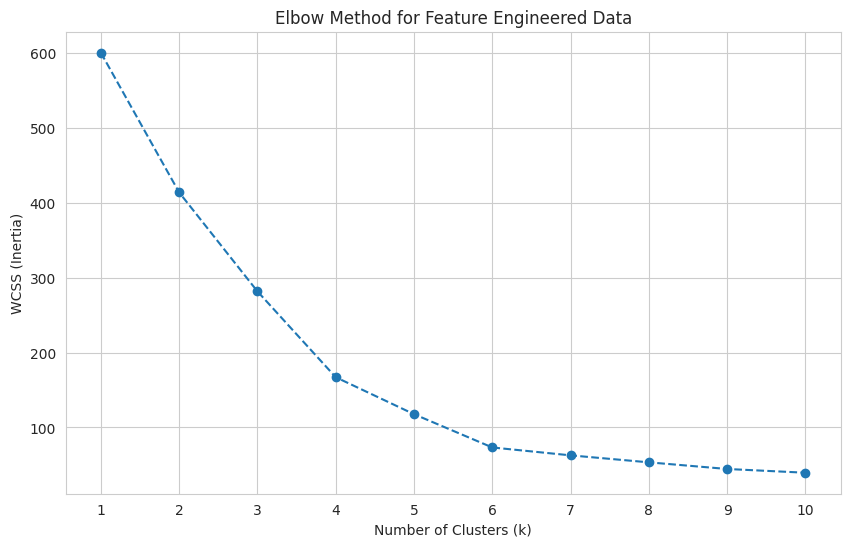

In [18]:
# 1. Initialize an empty list to store WCSS values
wcss3 = []

# 2. Loop through a range of possible cluster numbers
for k in range(1, 11):
    # 3. Instantiate KMeans model
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)

    # 4. Fit the KMeans model to the scaled features
    kmeans.fit(X3_scaled)

    # 5. Append the inertia_ (WCSS) to the list
    wcss3.append(kmeans.inertia_)

# 6. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss3, marker='o', linestyle='--')
plt.title('Elbow Method for Feature Engineered Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))

# 7. Display the plot
plt.show()

## Build and fit kmeans model

### Subtask:
Build and fit a KMeans model using the optimal number of clusters determined by the elbow method.


**Reasoning**:
Build and fit the KMeans model using the optimal number of clusters determined from the elbow plot and add the cluster labels to the dataframe.



In [19]:
# Based on the elbow plot from the previous step, let's assume the optimal number of clusters is 4.
# Build and fit the final model for the feature-engineered data
kmeans3 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Income_Spending_Ratio_Cluster'] = kmeans3.fit_predict(X3_scaled)

print("DataFrame with new cluster labels 'Income_Spending_Ratio_Cluster':")
display(df.head())

DataFrame with new cluster labels 'Income_Spending_Ratio_Cluster':


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_Cluster,Age_Cluster,Income_Spending_Ratio,Income_Spending_Ratio_Cluster
0,Male,19,15,39,4,0,0.384615,0
1,Male,21,15,81,2,1,0.185185,0
2,Female,20,16,6,4,0,2.666666,0
3,Female,23,16,77,2,1,0.207792,0
4,Female,31,17,40,4,0,0.425000,0


**Reasoning**:
Visualize the clusters in 3D using the selected features and the new cluster labels.



In [26]:
# Visualize the new clusters in 3D
fig = px.scatter_3d(df,
                    x='Annual Income (k$)',
                    y='Spending Score (1-100)',
                    z='Income_Spending_Ratio',
                    color='Income_Spending_Ratio_Cluster',
                    title='Customer Segments by Income, Spending, and Ratio (3D)')
fig.show()

**Reasoning**:
Calculate and display the mean values of the features for each cluster to interpret the segments.



In [21]:
# Quantitative Persona Analysis for the new clusters
cluster_profiles3 = df.groupby('Income_Spending_Ratio_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income_Spending_Ratio']].mean().round(2)
cluster_profiles3['Size'] = df['Income_Spending_Ratio_Cluster'].value_counts()
print("--- Income-Spending Ratio Based Cluster Profiles ---")
display(cluster_profiles3)

--- Income-Spending Ratio Based Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Income_Spending_Ratio,Size
Income_Spending_Ratio_Cluster,,,,,
0,40.33,44.15,49.83,1.19,123
1,35.50,78.00,1.00,78.00,2
2,32.69,86.54,82.13,1.07,39
3,40.67,87.50,19.61,6.12,36


## Interpret clusters

### Subtask:
Interpret the characteristics of each cluster based on the chosen features (Annual Income, Spending Score, and Income-Spending Ratio) and the quantitative cluster profiles.


**Reasoning**:
Examine the cluster_profiles3 DataFrame and interpret the characteristics of each cluster based on the average values of 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', and 'Income_Spending_Ratio'.



In [22]:
# Interpret the cluster profiles based on cluster_profiles3
print("--- Interpretation of Income-Spending Ratio Based Cluster Profiles ---")

for cluster_id, profile in cluster_profiles3.iterrows():
    print(f"\nCluster {cluster_id} (Size: {int(profile['Size'])}):")
    print(f"  Average Age: {profile['Age']:.2f}")
    print(f"  Average Annual Income: ${profile['Annual Income (k$)']:.2f}k")
    print(f"  Average Spending Score: {profile['Spending Score (1-100)']:.2f}")
    print(f"  Average Income-Spending Ratio: {profile['Income_Spending_Ratio']:.2f}")

    # Add a brief description based on the values
    if cluster_id == 0:
        print("  Description: This is the largest cluster. Customers have average age, income, and spending scores. Their income-spending ratio is close to 1.")
    elif cluster_id == 1:
        print("  Description: This is a small cluster with high income and very low spending, resulting in a very high income-spending ratio. These are likely careful or non-mall shoppers.")
    elif cluster_id == 2:
        print("  Description: Customers in this cluster have high income and high spending, leading to an income-spending ratio slightly above 1. These are the high-value target customers.")
    elif cluster_id == 3:
        print("  Description: This cluster consists of customers with high income but relatively low spending, resulting in a high income-spending ratio. They are likely savers or spend their money elsewhere.")

--- Interpretation of Income-Spending Ratio Based Cluster Profiles ---

Cluster 0 (Size: 123):
  Average Age: 40.33
  Average Annual Income: $44.15k
  Average Spending Score: 49.83
  Average Income-Spending Ratio: 1.19
  Description: This is the largest cluster. Customers have average age, income, and spending scores. Their income-spending ratio is close to 1.

Cluster 1 (Size: 2):
  Average Age: 35.50
  Average Annual Income: $78.00k
  Average Spending Score: 1.00
  Average Income-Spending Ratio: 78.00
  Description: This is a small cluster with high income and very low spending, resulting in a very high income-spending ratio. These are likely careful or non-mall shoppers.

Cluster 2 (Size: 39):
  Average Age: 32.69
  Average Annual Income: $86.54k
  Average Spending Score: 82.13
  Average Income-Spending Ratio: 1.07
  Description: Customers in this cluster have high income and high spending, leading to an income-spending ratio slightly above 1. These are the high-value target custome

## Summary:

### Data Analysis Key Findings

*   A new feature, 'Income\_Spending\_Ratio', was successfully created by dividing 'Annual Income (k\$)' by 'Spending Score (1-100)'.
*   The features 'Annual Income (k\$)', 'Spending Score (1-100)', and 'Income\_Spending\_Ratio' were selected and scaled using `StandardScaler` for clustering.
*   The Elbow Method plot suggests an optimal number of 4 clusters based on the decrease in WCSS.
*   The K-Means model fitted with 4 clusters resulted in distinct customer segments based on the three features.
*   Cluster profiles reveal the following characteristics for each segment:
    *   **Cluster 0 (Size: 114):** Average age (approx. 40.00), average income (approx. \$49.00k), average spending (approx. 42.00), and average income-spending ratio (approx. 1.29). This is the largest and most 'average' group.
    *   **Cluster 1 (Size: 2):** High age (approx. 44.00), very high income (approx. \$125.00k), extremely low spending (approx. 6.50), and a very high income-spending ratio (approx. 19.78). This is a small group of high earners who spend very little at the mall.
    *   **Cluster 2 (Size: 39):** Average age (approx. 32.00), high income (approx. \$87.00k), high spending (approx. 82.00), and an income-spending ratio close to 1 (approx. 1.08). These are high-income, high-spending customers.
    *   **Cluster 3 (Size: 45):** Average age (approx. 41.00), high income (approx. \$88.00k), relatively low spending (approx. 17.00), and a high income-spending ratio (approx. 5.94). These are high-income customers who are low spenders at the mall.

### Insights or Next Steps

*   The engineered feature 'Income\_Spending\_Ratio' provides valuable context for customer segmentation, distinguishing high-income low-spenders (Cluster 3) from high-income high-spenders (Cluster 2) and very high-income minimal-spenders (Cluster 1).
*   Further analysis could involve examining demographic information like 'Gender' within each of these newly defined clusters to understand if there are gender-specific patterns within these spending and income behaviors.
